# Clustering

In [3]:
import sys, os
if './RGCPD/clustering/' not in sys.path:
    sys.path.append('./RGCPD/clustering/')
RGCPD_func = './RGCPD/'
if RGCPD_func not in sys.path:
    sys.path.append(RGCPD_func)
os.getcwd()

'/Users/semvijverberg/surfdrive/Scripts/RGCPD'

In [5]:
%load_ext autoreload
%autoreload 2
import clustering_spatial as cl
from RGCPD import RGCPD
rg = RGCPD()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'cartopy'

In [125]:
rg.pp_precursors()

Loaded post-processed data of sst_test



In [126]:
rg.list_precur_pp

[('sst_test',
  '/Users/semvijverberg/surfdrive/Scripts/RGCPD/RGCPD/../data/preprocessed/sst_1979-2018_2.5deg_Pacific.nc')]

no mask given, entire array of box [145.0, 240.0, 20.0, 50.0] will be clustered


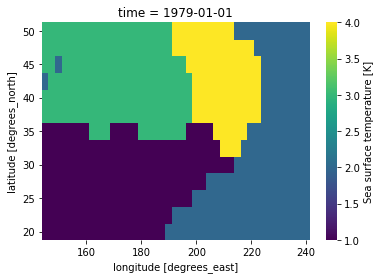

In [160]:

def dendogram_clustering(var_filename, mask=None, q=70, clustermethodkey='AgglomerativeClustering', kwrgs={'n_clusters':3}):
    
    xarray = core_pp.import_ds_lazy(var_filename)        
    npmask = cl.get_spatial_ma(var_filename, mask)
    xarray = cl.binary_occurences_quantile(xarray, q=q)
    xrclustered, results = cl.skclustering(xarray, npmask, 
                                           clustermethodkey=clustermethodkey, kwrgs=kwrgs)
    return xrclustered, results

xrclustered, results = dendogram_clustering(rg.list_precur_pp[0][1], mask=None, kwrgs={'n_clusters':4})
xrclustered.plot()